In [ ]:
from dotenv import load_dotenv
from langchain_teddynote import logging

logging.langsmith("allforone")

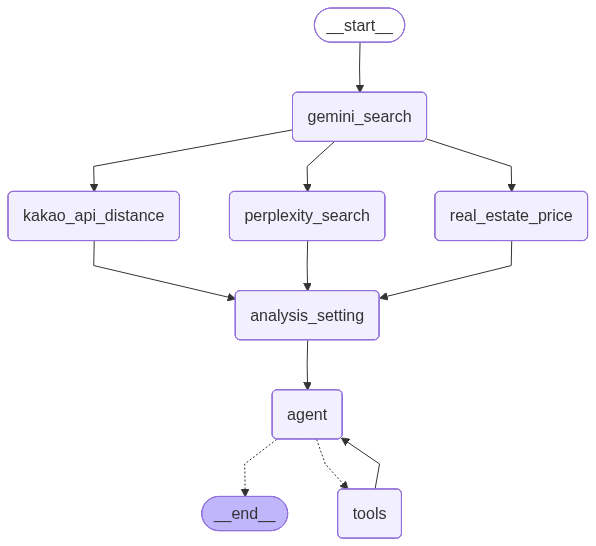

In [2]:
from agents.analysis.nearby_market_agent import graph_builder

graph = graph_builder.compile()
graph

In [ ]:
from agents.analysis.run_test.nearby_market_agent_test import nearby_market_graph

invoke = await nearby_market_graph.ainvoke(
    {
        "start_input": {
            "target_area": "서울 강남구 역삼동",
            "total_units": "1000세대",
            "main_type": "84제곱미터",
        }
    }
)

[DEBUG] 주소에서 추출한 아파트명: 역삼래미안
[DEBUG] 아파트명 불일치 - 추출: '역삼래미안', 실제: '쌍용대치아파트1동,2동,3동,5동,6동'
[DEBUG] 아파트명 불일치 - 추출: '역삼래미안', 실제: '개포자이프레지던스'
[DEBUG] 아파트명 불일치 - 추출: '역삼래미안', 실제: '삼익'
[DEBUG] 아파트명 불일치 - 추출: '역삼래미안', 실제: '강남자곡아이파크'
[DEBUG] 아파트명 불일치 - 추출: '역삼래미안', 실제: '아카데미스위트1'
[DEBUG] 아파트명 불일치 - 추출: '역삼래미안', 실제: '현대6차(78~81,83,84,86,87동)'
[DEBUG] 아파트명 불일치 - 추출: '역삼래미안', 실제: '삼성래미안'
[DEBUG] 아파트명 불일치 - 추출: '역삼래미안', 실제: '래미안강남힐즈'
[DEBUG] 아파트명 불일치 - 추출: '역삼래미안', 실제: '도곡쌍용예가'
[DEBUG] 아파트명 불일치 - 추출: '역삼래미안', 실제: '강남 더샵 포레스트'
[DEBUG] 아파트명 불일치 - 추출: '역삼래미안', 실제: 'e-편한세상'
[DEBUG] 아파트명 불일치 - 추출: '역삼래미안', 실제: '포스코더샵'
[DEBUG] 아파트명 불일치 - 추출: '역삼래미안', 실제: '한신(개포)'
[DEBUG] 아파트명 불일치 - 추출: '역삼래미안', 실제: '수서한아름'
[DEBUG] 아파트명 불일치 - 추출: '역삼래미안', 실제: '풍림(1차)'
[DEBUG] 아파트명 불일치 - 추출: '역삼래미안', 실제: '롯데캐슬리베'
[DEBUG] 아파트명 불일치 - 추출: '역삼래미안', 실제: '래미안대치팰리스'
[DEBUG] 아파트명 불일치 - 추출: '역삼래미안', 실제: '강남데시앙포레'
[DEBUG] 아파트명 불일치 - 추출: '역삼래미안', 실제: '매봉삼성'
[DEBUG] 아파트명 불일치 - 추출: '역삼래미안', 실제: '진흥아파트'
[DEBUG] 아파트명 불일치 - 추출: '역삼래미안', 실

In [ ]:
print(invoke)

In [ ]:
# Tool 사용 내역 확인
print("=" * 50)
print("🔧 Tool 사용 내역")
print("=" * 50)

for i, msg in enumerate(invoke['messages']):
    msg_type = type(msg).__name__
    
    # AIMessage에서 tool_calls 확인
    if msg_type == 'AIMessage' and hasattr(msg, 'tool_calls') and msg.tool_calls:
        print(f"\n[{i}] AI가 호출한 Tools:")
        for tool_call in msg.tool_calls:
            print(f"  📍 {tool_call['name']}")
            print(f"     Args: {tool_call['args']}")
    
    # ToolMessage에서 실행 결과 확인
    elif msg_type == 'ToolMessage':
        print(f"\n[{i}] Tool 실행 결과:")
        print(f"  📍 {msg.name}")
        # 내용이 너무 길 수 있으므로 앞부분만 출력
        content_preview = msg.content[:200] + "..." if len(msg.content) > 200 else msg.content
        print(f"     Result: {content_preview}")

In [ ]:
print(invoke["messages"])

In [2]:
output = invoke["nearby_market_output"]

result_json = output["result"]

print("=" * 50)
print("📊 최종 분석 결과")
print("=" * 50)
print(result_json)

📊 최종 분석 결과
{
  "매매아파트": [
    {
      "주소와단지명": "서울시 강남구 역삼동 역삼래미안",
      "전체세대수": "1050세대",
      "타입": "84㎡",
      "평당매매가격": "11031.7",
      "사업지와의 거리": "약 1.0km",
      "거래일자": "2025-10-16",
      "입지정보": "강남 중심부 위치, 테헤란로 업무지구 인접, 강남8학군, 다양한 주거형태 혼재, 교통·생활 인프라 우수",
      "주변호재": "테헤란로 업무지구 직주근접, 강남역·선릉역 더블역세권, 강남8학군, 대규모 리모델링·재개발(인근 역삼금호어울림 등)"
    },
    {
      "주소와단지명": "서울시 강남구 도곡동 도곡렉슬",
      "전체세대수": "3002세대",
      "타입": "84㎡",
      "평당매매가격": "6488.1",
      "사업지와의 거리": "약 1.5km",
      "거래일자": "2025-11-05",
      "입지정보": "강남권 대표 대단지, 대치동 학원가 인접, 분당선/3호선 도곡역 초역세권, 양재천 공원 인근, 재건축·리모델링 활발",
      "주변호재": "한보에르마, 대치미도 등 인근 재건축, 도곡삼호(2026년 완공 예정) 등 대규모 정비사업, 우수한 학군·교통"
    },
    {
      "주소와단지명": "서울시 강남구 개포동 개포래미안포레스트",
      "전체세대수": "2296세대",
      "타입": "84㎡",
      "평당매매가격": "9166.4",
      "사업지와의 거리": "약 2.5km",
      "거래일자": "2025-07-18",
      "입지정보": "개포동 신축 대단지 주거벨트, 구룡산·달터공원 등 쾌적한 자연환경, 교통·학군 우수, 미래 교통호재(위례-과천선 등)",
      "주변호재": "위례-과천선 개통 예정, 신분당선 연장, 자연환경(구룡산,

In [ ]:
print("=" * 50)
print("🔍 Gemini 검색 결과")
print("=" * 50)
print(output["gemini_search"])

In [ ]:
import json
print("=" * 50)
print("📍 카카오 API 위치 정보")
print("=" * 50)
print(json.dumps(output["kakao_api_distance_context"], ensure_ascii=False, indent=2))

In [ ]:
print("=" * 50)
print("real_estate_price 검색 결과")
print("=" * 50)
print(output["real_estate_price_context"])

In [ ]:
print("=" * 50)
print("🌐 Perplexity 검색 결과")
print("=" * 50)
print(output["perplexity_search"])